# Investigating Morten's Mon R2 file

On June 6, Morten sent a data file with the following description:

> "I've attached a file that has the HST photometry
for all sources, whether it is consistent with having a circumstellar
disk, the extinction, and the mass estimated.
A few caveats: I ran the extinction and mass determination on the
whole list with no restrictions. so until extinction cuts etc are made
the samples will differ. Also, masses close to 1.4 Msun or very low
mass brown dwarfs are limits since the closest mass on the isochrone
in terms of J band magnitude is used for the excess sources and the
weighted average for the two closest points for the non-excess sample."

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import astropy.table

In [2]:
location = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/data/auxiliary_catalogs/MonR2"

In [3]:
filepath = os.path.join(location, "MortenAndersen/phot_ruby_edited.dat")
filepath_published = os.path.join(location, "Andersen_2006AJ_132_2296A_table2.fit")

monr2_table_raw = astropy.table.Table.read(
    filepath, format='ascii', header_start=0, data_start=1
)

too_faint = (monr2_table_raw['eF110W']>10)
# Here, we remove about six rows from the table. 
# - One for a star with enormous photometric errors (row 34)
# - Five for apparent duplicates at the end of the table
monr2_table = monr2_table_raw[~too_faint][:181]

monr2_published_table = astropy.table.Table.read(filepath_published)


In [4]:
monr2_published_table.show_in_notebook()

idx,__AMO2006_,RAJ2000,DEJ2000,F110W,e_F110W,F160W,e_F160W,F165M,e_F165M,F207M,e_F207M,_2MASS
,,deg,deg,mag,mag,mag,mag,mag,mag,mag,mag,
0,1,91.93742,-6.39050,23.11,0.51,17.32,0.050,17.10,0.05,14.47,0.06,06074492-0623257
1,2,91.94012,-6.39031,24.55,1.21,19.77,0.070,19.41,0.07,17.07,0.07,
2,3,91.93287,-6.39078,18.58,0.03,16.20,0.040,15.90,0.04,15.48,0.06,
3,4,91.93675,-6.39050,17.34,0.03,14.77,0.030,14.55,0.03,13.89,0.05,06074483-0623260
4,5,91.93442,-6.39042,16.12,0.04,13.81,0.040,13.58,0.04,13.04,0.06,06074426-0623256
5,6,91.94862,-6.38944,20.17,0.04,18.45,0.040,18.15,0.04,17.90,0.08,
6,7,91.94200,-6.38939,18.62,0.03,15.92,0.030,15.68,0.03,15.01,0.05,
7,8,91.93742,-6.38942,21.13,0.05,17.56,0.030,17.29,0.03,16.17,0.05,
8,9,91.94679,-6.38856,20.88,0.05,18.74,0.040,18.51,0.04,18.03,0.08,


In [87]:
monr2_table.show_in_notebook()

idx,F110W,eF110W,F160W,eF160W,F207M,eF207M,F165M,eF165M,Av,excess,mass
0,23.11,0.507,17.318,0.045,14.467,0.064,17.102,0.045,-269.637,1.0,0.006
1,24.548,1.214,19.771,0.068,17.066,0.071,19.407,0.072,-303.211,1.0,0.006
2,18.581,0.039,16.197,0.039,15.479,0.064,15.895,0.039,10.3965,0.0,0.126227
3,17.343,0.027,14.774,0.028,13.888,0.045,14.549,0.028,12.0533,0.0,0.548328
4,16.121,0.038,13.813,0.039,13.041,0.064,13.584,0.039,9.39457,0.0,0.775895
5,20.172,0.043,18.454,0.041,17.895,0.081,18.152,0.041,1.41963,1.0,0.012
6,18.619,0.027,15.922,0.028,15.014,0.045,15.678,0.028,13.5611,0.0,0.234454
7,21.131,0.047,17.563,0.028,16.174,0.046,17.286,0.029,22.1018,0.0,0.202609
8,20.88,0.05,18.743,0.043,18.025,0.08,18.512,0.044,6.07275,1.0,0.02
9,17.75,0.038,14.955,0.039,13.629,0.064,14.671,0.039,12.4653,1.0,0.4


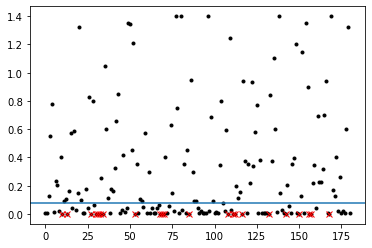

In [58]:
plt.plot(monr2_table['mass'], 'k.')
plt.axhline(0.08)
plt.plot(np.arange(len(monr2_table['mass']))[monr2_table['mass'] == 0], monr2_table['mass'][monr2_table['mass'] == 0], 'rx')


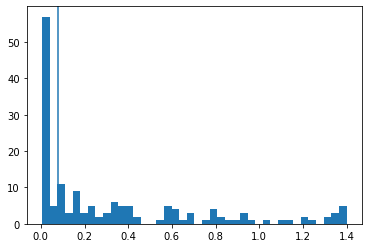

In [59]:
plt.hist(monr2_table['mass'][monr2_table['mass']>0], bins=40)
plt.axvline(0.08)

In [60]:
np.min(monr2_table['mass'][monr2_table['mass']>0])

0.006

In [106]:
mass = monr2_table['mass']

number_of_bds = np.sum((mass > 0) & (mass <= 0.08))

print(f"Number of BDs (naively estimated): {number_of_bds}")

Number of BDs (naively estimated): 63


(11.654500198364257, 26.73549919128418)

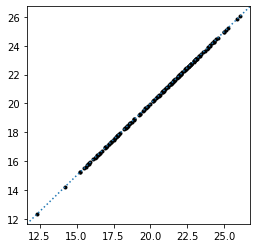

In [103]:
# Let's confirm that each and every row of the published table
# matches each and every row of the custom table.

fig, ax = plt.subplots(1, figsize=(4,4))
ax.plot(monr2_table['F110W'], monr2_published_table['F110W'], 'k.')
xlims = ax.get_xlim()
ylims = ax.get_ylim()

ax.plot([0,50], [0,50], ':')

ax.set_xlim(xlims)
ax.set_ylim(ylims)


In [88]:
for i, (x, y) in enumerate(zip(monr2_table['F110W'], monr2_published_table['F110W'])):
    print(f"{i:3d}:  {x:2.2f}  {y:2.2f}  {x-y:2.2f}")

  0:  23.11  23.11  -0.00
  1:  24.55  24.55  -0.00
  2:  18.58  18.58  0.00
  3:  17.34  17.34  0.00
  4:  16.12  16.12  0.00
  5:  20.17  20.17  0.00
  6:  18.62  18.62  -0.00
  7:  21.13  21.13  0.00
  8:  20.88  20.88  0.00
  9:  17.75  17.75  0.00
 10:  15.51  15.51  0.00
 11:  21.76  21.76  0.00
 12:  18.61  18.62  -0.01
 13:  15.26  15.26  0.00
 14:  18.91  18.91  -0.00
 15:  17.00  17.00  -0.00
 16:  21.25  21.25  0.00
 17:  16.32  16.32  -0.00
 18:  22.56  22.56  -0.00
 19:  18.43  18.43  -0.00
 20:  22.75  22.75  -0.00
 21:  18.46  18.46  0.00
 22:  -1.00  nan  nan
 23:  -1.00  nan  nan
 24:  16.98  16.98  -0.00
 25:  21.33  21.33  -0.00
 26:  15.84  15.84  0.00
 27:  16.95  16.95  0.00
 28:  20.55  20.55  0.00
 29:  21.62  21.62  -0.00
 30:  24.16  24.16  0.00
 31:  21.38  21.38  -0.00
 32:  -1.00  nan  nan
 33:  20.83  20.83  0.00
 34:  20.79  20.79  -0.00
 35:  20.79  20.79  -0.00
 36:  21.37  21.37  -0.00
 37:  -1.00  nan  nan
 38:  16.73  16.73  0.00
 39:  19.51  19.51  

In [83]:
monr2_table['eF110W'][monr2_table['eF110W']>10]

46.375


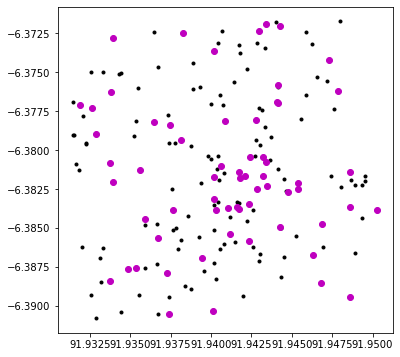

In [107]:
fig, ax = plt.subplots(1, figsize=(6,6))

ax.plot(
    monr2_published_table["RAJ2000"], 
    monr2_published_table["DEJ2000"], 
    'k.')

bds = ((mass > 0) & (mass <= 0.08))

ax.plot(
    monr2_published_table["RAJ2000"][bds], 
    monr2_published_table["DEJ2000"][bds], 
    'mo')


# A quick note on the above map

The objects in the above plot are scattered across an EXTREMELY small region: less than 0.02 degrees across (i.e., spanning the central ~2% of our field by width). So... this may not be that great.

Text(0, 0.5, 'm_F110W')

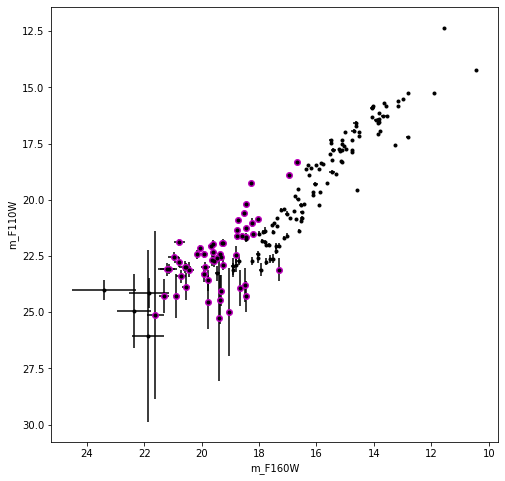

In [118]:
fig, ax = plt.subplots(1, figsize=(8,8))

ax.errorbar(
    monr2_published_table["F160W"], 
    monr2_published_table["F110W"], 
    xerr=monr2_published_table["e_F160W"],
    yerr=monr2_published_table["e_F110W"],
    fmt='k.')

# bds = ((mass > 0) & (mass <= 0.08))

ax.plot(
    monr2_published_table["F160W"][bds], 
    monr2_published_table["F110W"][bds], 
    'mo')

ax.invert_xaxis()
ax.invert_yaxis()

ax.set_xlabel("m_F160W")
ax.set_ylabel("m_F110W")


Text(0.5, 1.0, 'Reproduction of Figure 2, Andersen+06')

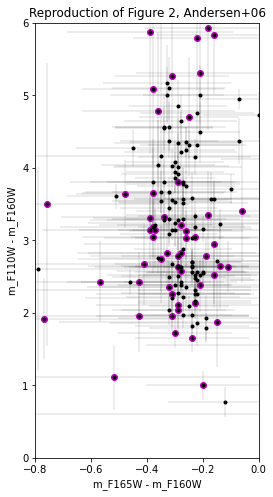

In [134]:
fig, ax = plt.subplots(1, figsize=(4,8))

tab = monr2_published_table

ax.errorbar(
    tab["F165M"] - tab["F160W"], 
    tab["F110W"] - tab["F160W"], 
    xerr=(tab["e_F165M"] + tab["e_F160W"]**2)**0.5,
    yerr=(tab["e_F110W"] + tab["e_F160W"]**2)**0.5,
    fmt='k.',
    elinewidth=0.15
    )

# bds = ((mass > 0) & (mass <= 0.08))

ax.plot(
    (tab["F165M"] - tab["F160W"])[bds], 
    (tab["F110W"] - tab["F160W"])[bds], 
    'mo')

ax.set_xlabel("m_F165W - m_F160W")
ax.set_ylabel("m_F110W - m_F160W")

ax.set_xlim(-0.8, 0)
ax.set_ylim(0, 6)
ax.set_title("Reproduction of Figure 2, Andersen+06")


Text(0.5, 1.0, '~Reproduction of Figure 4, Andersen+06')

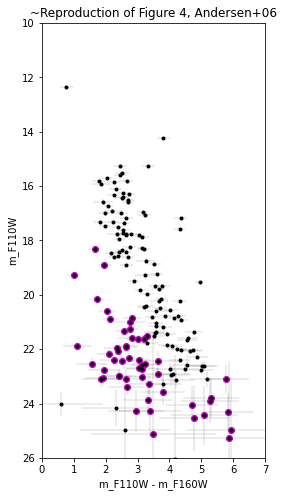

In [135]:
fig, ax = plt.subplots(1, figsize=(4,8))

tab = monr2_published_table

ax.errorbar(
    tab["F110W"] - tab["F160W"], 
    tab["F110W"],
    xerr=(tab["e_F110W"] + tab["e_F160W"]**2)**0.5,
    yerr=tab["e_F110W"],
    fmt='k.',
    elinewidth=0.15
    )

# bds = ((mass > 0) & (mass <= 0.08))

ax.plot(
    (tab["F110W"] - tab["F160W"])[bds], 
    tab["F110W"][bds],
    'mo')

# ax.invert_xaxis()
ax.invert_yaxis()

ax.set_ylabel("m_F110W")
ax.set_xlabel("m_F110W - m_F160W")

ax.set_xlim(0, 7)
ax.set_ylim(26, 10)
ax.set_title("~Reproduction of Figure 4, Andersen+06")


# Some thoughts on what to do next -

I'll want to see which of the "purple" sources matches to sources in our own data with good photometry. Are they too faint to be useful?

It seems that (in Figure 4) there are *really* not many objects in this CMD with J magnitudes above 17-18.
BUT! Tom, we should remember: we have H and K mags, and these objects are likely (on average) to be notably brighter in those bandpasses. So, don't lose hope.

I'll want to consider dealing with photometric errors in the Andersen data. I could consider a couple of things:
(a) restrict my selection to only objects with errors below 0.06 mag, as Andersen does in Figure 2;
(b) make a cut at the 90% completeness limit, like Andersen notes in Figure 4 - 